In [47]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import chi2_contingency

In [31]:
# Set the path to the CSV file
file_path = r'C:\Users\arian\OneDrive\Data_Management_UofT\Project 1\Crime_Data_from_2020_to_Present.csv'

# Read the CSV file into a DataFrame
crime_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
crime_data.head()


DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [32]:
# Check for missing values in the DataFrame
missing_values = crime_data.isnull().sum()

# Display the count of missing values for each column
missing_values[missing_values > 0]

Mocodes           118311
Vict Sex          112606
Vict Descent      112614
Premis Cd             10
Premis Desc          518
Weapon Used Cd    556202
Weapon Desc       556202
Crm Cd 1              11
Crm Cd 2          790429
Crm Cd 3          850837
Crm Cd 4          852888
Cross Street      717289
dtype: int64

In [33]:
# Drop columns with a large number of missing values
columns_to_drop = ['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
crime_data = crime_data.drop(columns=columns_to_drop)

# Impute missing values for specific columns
columns_to_impute = ['Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc']
for column in columns_to_impute:
    if crime_data[column].dtype == 'O':
        # For categorical columns, fill with the mode
        crime_data[column].fillna(crime_data[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the median
        crime_data[column].fillna(crime_data[column].median(), inplace=True)

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]

Mocodes     118311
Crm Cd 1        11
dtype: int64

In [34]:
# Impute missing values for 'Mocodes' and 'Crm Cd 1'
crime_data['Mocodes'].fillna('', inplace=True)  # Assuming Mocodes is a text column, fill with an empty string
crime_data['Crm Cd 1'].fillna(crime_data['Crm Cd 1'].mode()[0], inplace=True)  # Fill with the mode for 'Crm Cd 1'

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]

Series([], dtype: int64)

In [35]:
# Overview of crime counts by area
crime_counts_by_area = crime_data['AREA NAME'].value_counts()

# Display the top 10 areas with the highest crime counts
top_areas = crime_counts_by_area.head(10)
print("Top 10 Areas with the Highest Crime Counts:")
print(top_areas)

# Overview of crime counts by crime type
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()

# Display the top 10 crime types with the highest counts
top_crime_types = crime_counts_by_type.head(10)
print("\nTop 10 Crime Types with the Highest Counts:")
print(top_crime_types)

Top 10 Areas with the Highest Crime Counts:
AREA NAME
Central        57691
77th Street    53631
Pacific        49850
Southwest      47858
Hollywood      45018
Southeast      43357
Olympic        42979
Newton         42743
N Hollywood    42455
Wilshire       40648
Name: count, dtype: int64

Top 10 Crime Types with the Highest Counts:
Crm Cd Desc
VEHICLE - STOLEN                                           91473
BATTERY - SIMPLE ASSAULT                                   67976
THEFT OF IDENTITY                                          53467
BURGLARY FROM VEHICLE                                      52611
BURGLARY                                                   51961
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51826
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48876
THEFT PLAIN - PETTY ($950 & UNDER)                         43402
INTIMATE PARTNER - SIMPLE ASSAULT                          42729
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32875
Nam

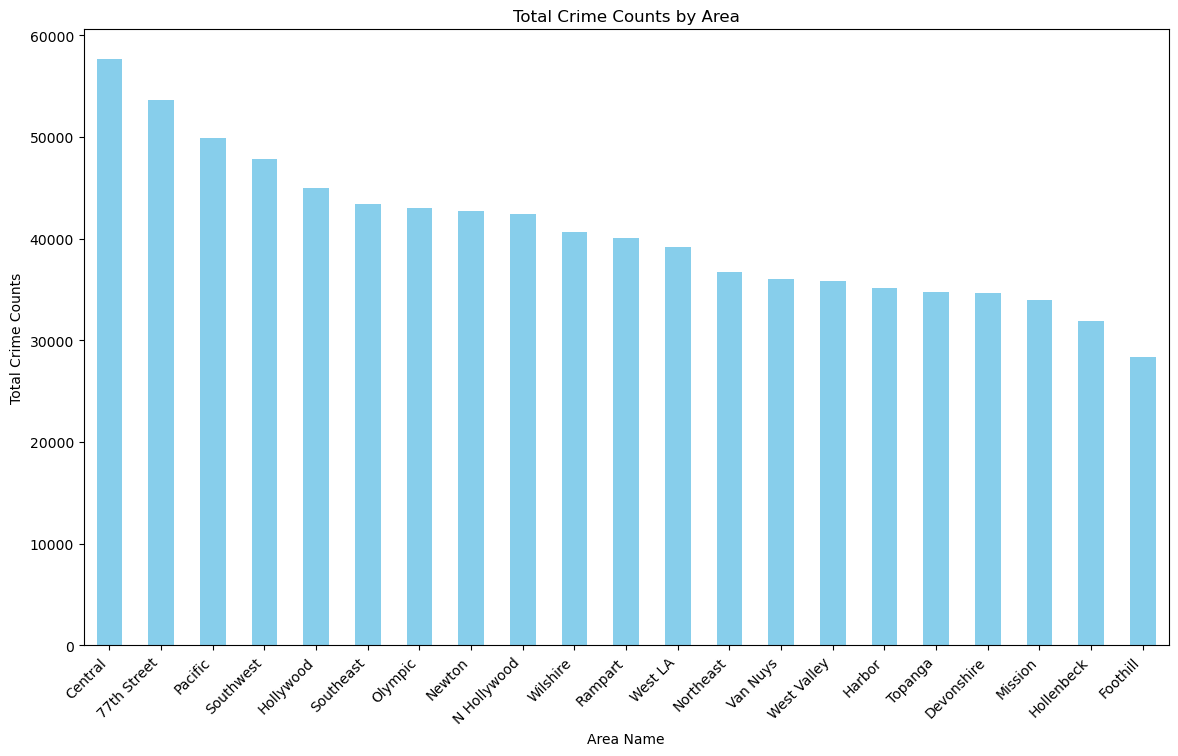

In [36]:
# Bar plot showing the total crime counts for each area using matplotlib
plt.figure(figsize=(14, 8))
crime_data['AREA NAME'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Crime Counts by Area')
plt.xlabel('Area Name')
plt.ylabel('Total Crime Counts')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\arian\AppData\Local\Temp\ipykernel_8312\1338851844.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])


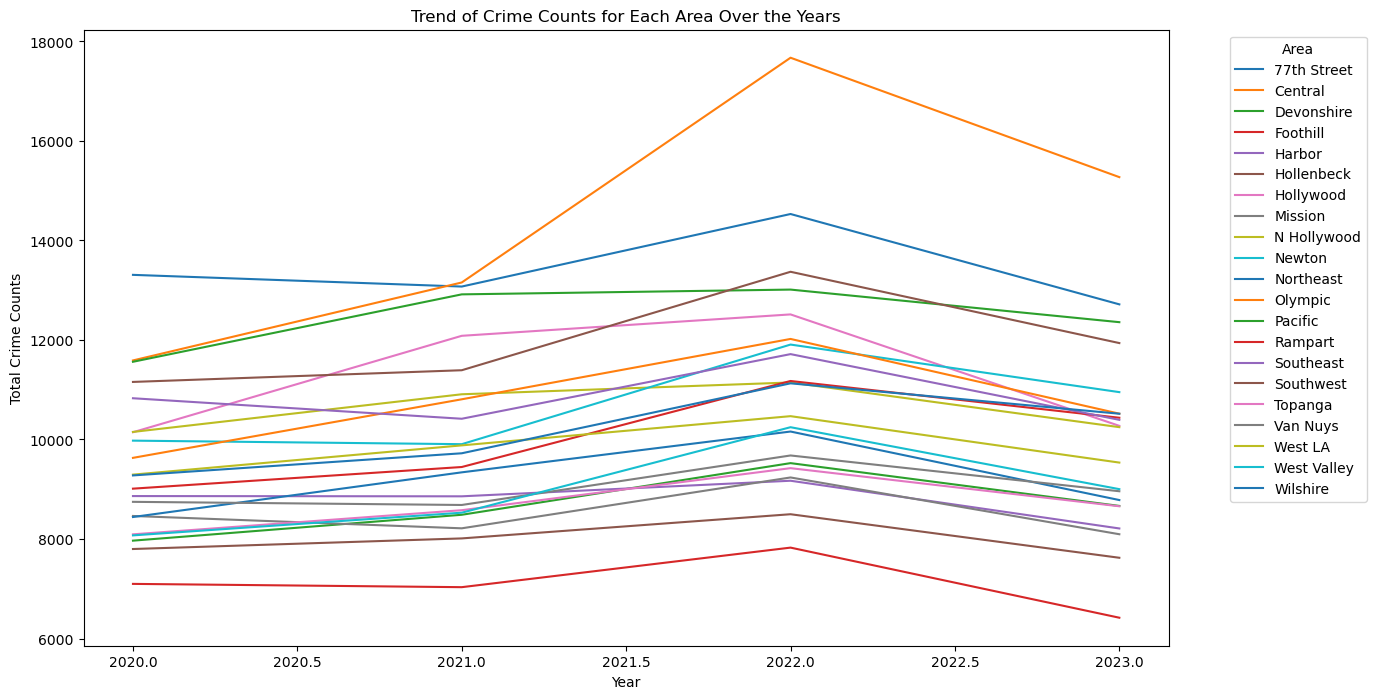

In [37]:
# Convert 'DATE OCC' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract the year from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year

# Line plot showing the trend of crime counts for each area over the years
plt.figure(figsize=(14, 8))

# Group by 'Year' and 'AREA NAME' and calculate total crime counts
crime_counts_by_area_year = crime_data.groupby(['Year', 'AREA NAME'])['DR_NO'].count().reset_index()

# Iterate over unique areas and plot individual lines
for area in crime_counts_by_area_year['AREA NAME'].unique():
    area_data = crime_counts_by_area_year[crime_counts_by_area_year['AREA NAME'] == area]
    plt.plot(area_data['Year'], area_data['DR_NO'], label=area)

plt.title('Trend of Crime Counts for Each Area Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crime Counts')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

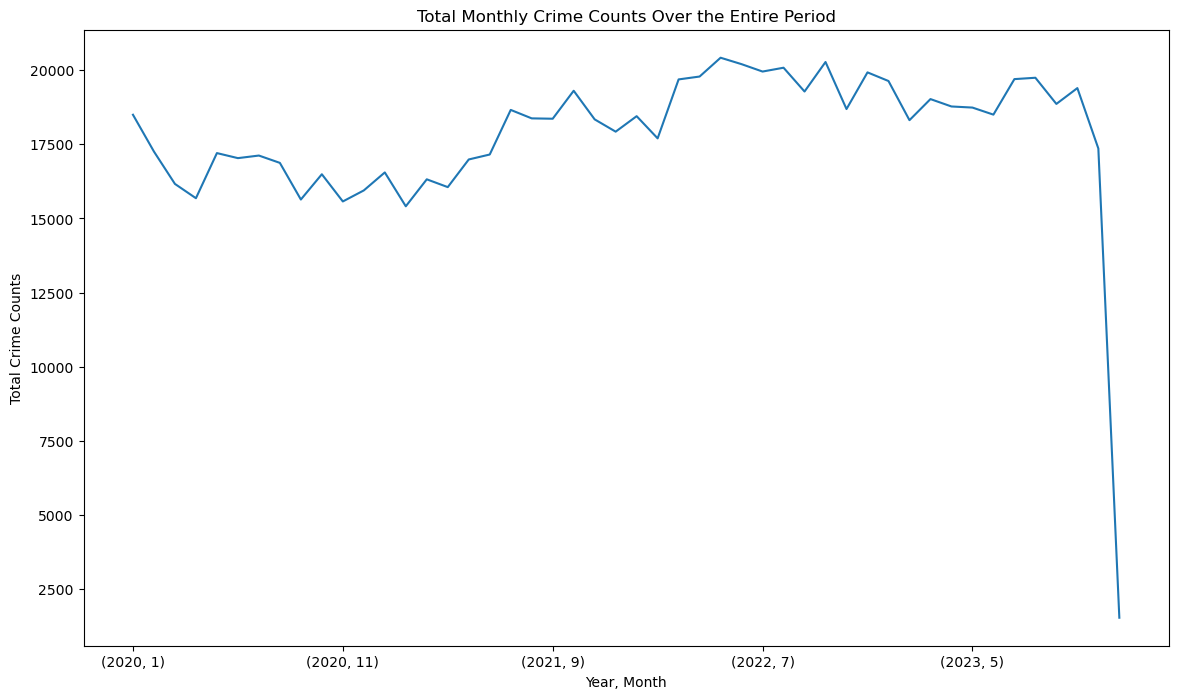

In [38]:
# Convert 'DATE OCC' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract the year and month from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Line plot showing the trend of crime counts for each area over the years
plt.figure(figsize=(14, 8))
crime_data.groupby(['Year', 'Month']).size().plot(legend=False)
plt.title('Total Monthly Crime Counts Over the Entire Period')
plt.xlabel('Year, Month')
plt.ylabel('Total Crime Counts')
plt.show()

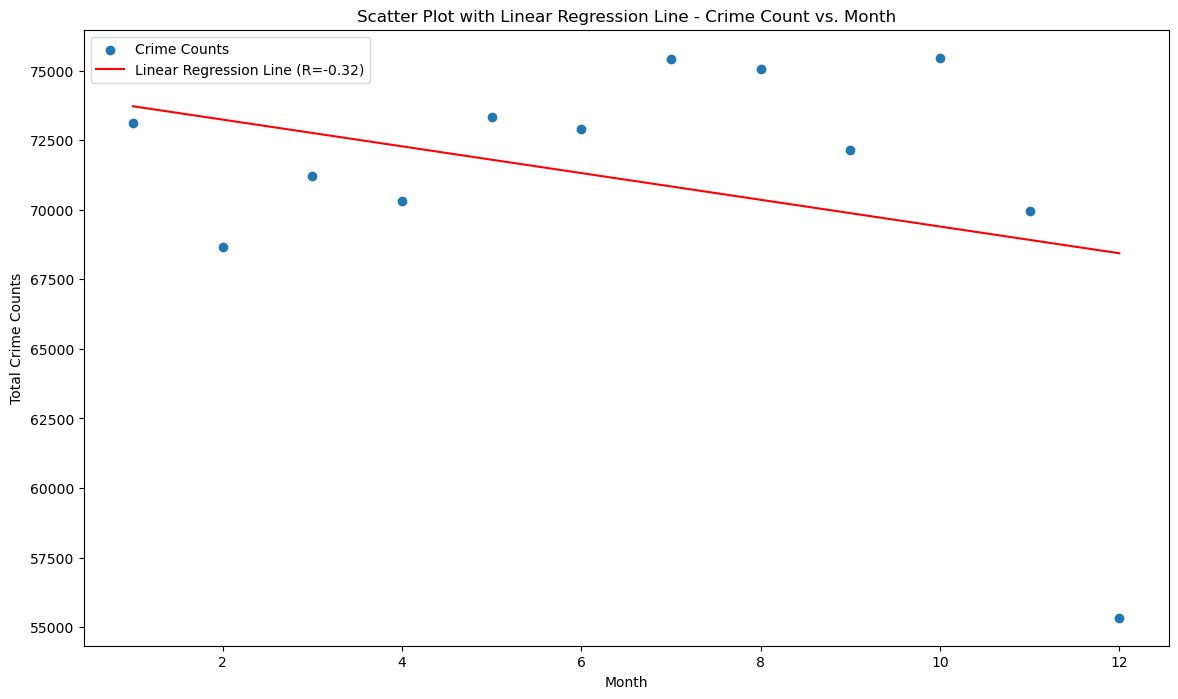

In [39]:
# Convert 'DATE OCC' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract the month from the 'DATE OCC' column
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Scatter plot with a linear regression line
plt.figure(figsize=(14, 8))
plt.scatter(crime_data.groupby('Month').size().index, crime_data.groupby('Month').size().values, label='Crime Counts')

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(crime_data.groupby('Month').size().index, crime_data.groupby('Month').size().values)
plt.plot(crime_data.groupby('Month').size().index, slope * crime_data.groupby('Month').size().index + intercept, color='red', label=f'Linear Regression Line (R={r_value:.2f})')

plt.title('Scatter Plot with Linear Regression Line - Crime Count vs. Month')
plt.xlabel('Month')
plt.ylabel('Total Crime Counts')
plt.legend()
plt.show()

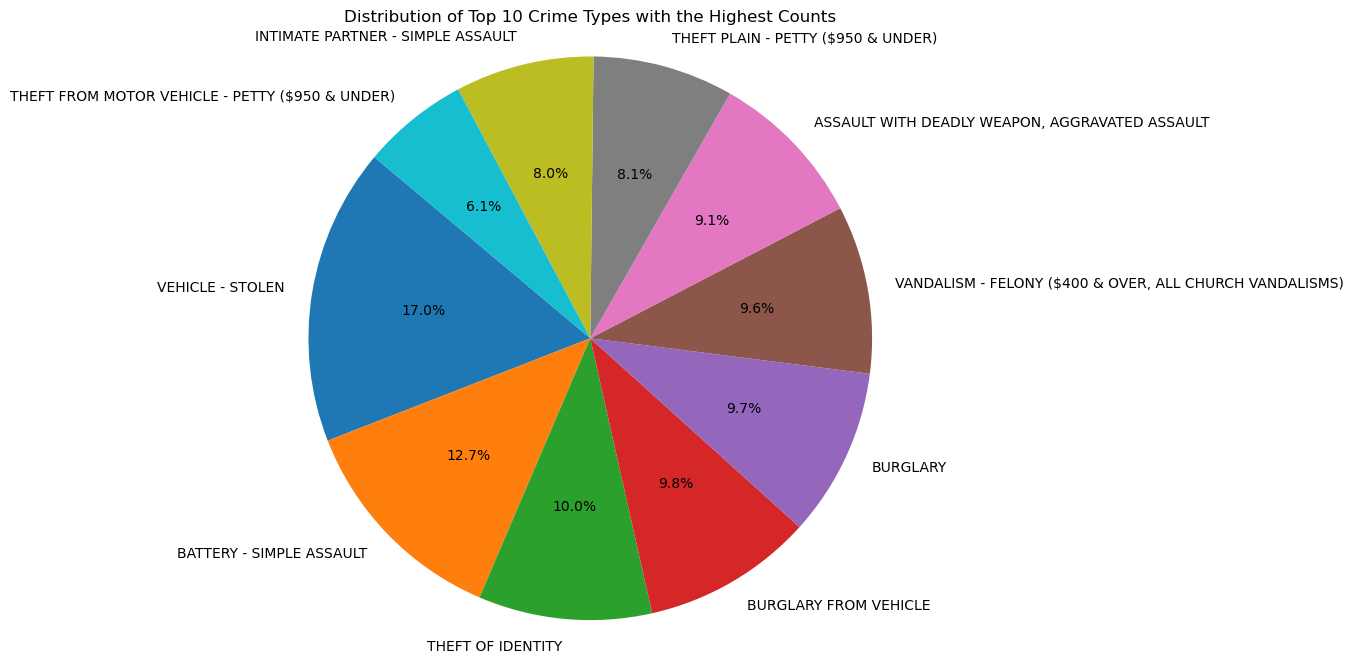

In [40]:
# Provided data of top 10 crime types with counts
crime_types = [
    'VEHICLE - STOLEN', 'BATTERY - SIMPLE ASSAULT', 'THEFT OF IDENTITY',
    'BURGLARY FROM VEHICLE', 'BURGLARY', 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'THEFT PLAIN - PETTY ($950 & UNDER)',
    'INTIMATE PARTNER - SIMPLE ASSAULT', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'
]
crime_counts = [91473, 67976, 53467, 52611, 51961, 51826, 48876, 43402, 42729, 32875]

# Create a pie chart for the distribution of the top 10 crime types
plt.figure(figsize=(8, 8))
plt.pie(crime_counts, labels=crime_types, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Top 10 Crime Types with the Highest Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

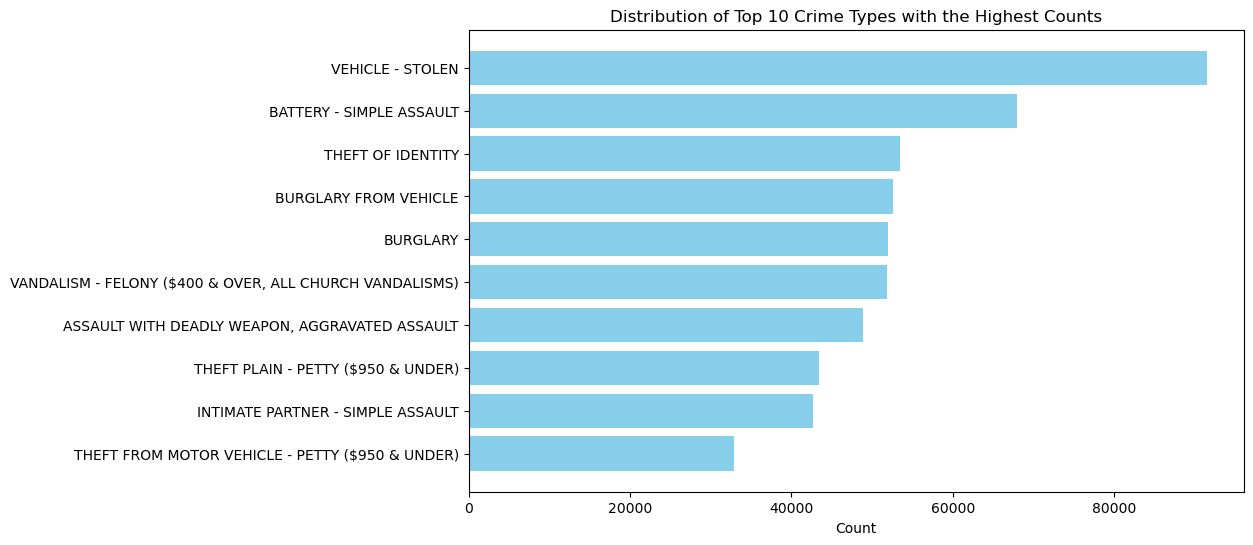

In [41]:
# Create a bar plot for the distribution of the top 10 crime types
plt.figure(figsize=(10, 6))
plt.barh(crime_types, crime_counts, color='skyblue')
plt.xlabel('Count')
plt.title('Distribution of Top 10 Crime Types with the Highest Counts')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count at the top

plt.show()

In [44]:
# Statistical Test: 
# Chi-square test to analyze the association between crime types and other categorical variables.

# Read the CSV file
crime_data = pd.read_csv(file_path)

# Extract necessary columns (replace these columns with your specific columns)
crime_types_column = 'Crm Cd Desc'  # Column containing crime types
other_categorical_column = 'AREA NAME'  # Column containing another categorical variable

# Create a contingency table
contingency_table = pd.crosstab(crime_data[crime_types_column], crime_data[other_categorical_column])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 129116.05150370265
P-value: 0.0
Degrees of Freedom: 2740
Expected Frequencies:
[[1.47698246e+02 1.58879370e+02 9.54085890e+01 ... 1.07903358e+02
  9.87326326e+01 1.11943434e+02]
 [6.37573527e+01 6.85839428e+01 4.11853168e+01 ... 4.65789718e+01
  4.26202169e+01 4.83229638e+01]
 [3.07317985e+03 3.30582721e+03 1.98518101e+03 ... 2.24516156e+03
  2.05434489e+03 2.32922404e+03]
 ...
 [6.75865665e+02 7.27030376e+02 4.36588729e+02 ... 4.93764663e+02
  4.51799518e+02 5.12252010e+02]
 [5.37598980e+01 5.78296559e+01 3.47272642e+01 ... 3.92751685e+01
  3.59371651e+01 4.07456944e+01]
 [2.20069758e+00 2.36729586e+00 1.42158391e+00 ... 1.60775544e+00
  1.47111202e+00 1.66795240e+00]]


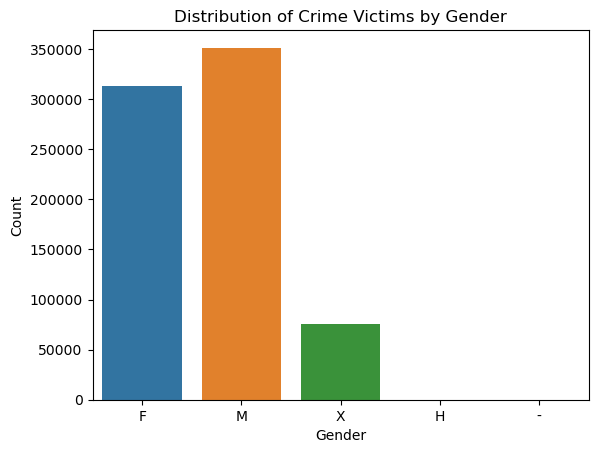

In [48]:
# Assuming 'Vict Sex' is the column representing victim gender in your dataset
# Replace 'data' with your actual DataFrame containing the crime data
sns.countplot(x='Vict Sex', data=crime_data)
plt.title('Distribution of Crime Victims by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

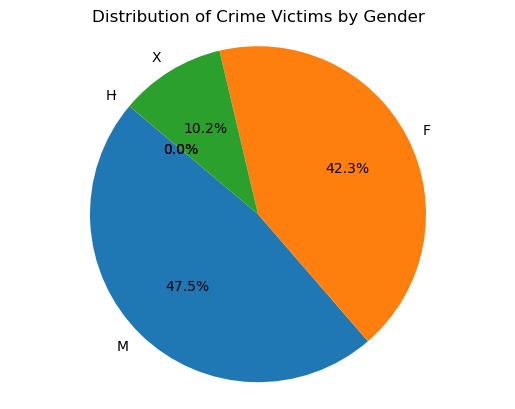

In [49]:
# Assuming 'Vict Sex' is the column representing victim gender in your dataset
# Replace 'data' with your actual DataFrame containing the crime data
gender_counts = crime_data['Vict Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Crime Victims by Gender')
plt.show()

In [57]:
# Overview of crime counts by Victim Descent
Vict_Descent = crime_data['Vict Descent'].value_counts()

# Display the top 10 crime types with the highest counts
top_vic_descent = Vict_Descent.head(10)
print("\nTop 10 Victim Descent with the Highest Counts:")
print(top_vic_descent)


Top 10 Victim Descent with the Highest Counts:
Vict Descent
H    261144
W    173438
B    120895
X     83214
O     67532
A     18700
K      4579
F      3580
C      3313
J      1181
Name: count, dtype: int64


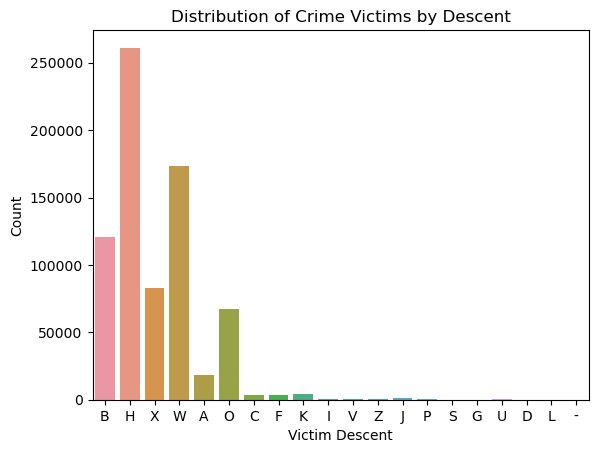

In [51]:
# Assuming 'Vict Descent' is the column representing victim gender in your dataset
# Replace 'data' with your actual DataFrame containing the crime data
sns.countplot(x='Vict Descent', data=crime_data)
plt.title('Distribution of Crime Victims by Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')
plt.show()

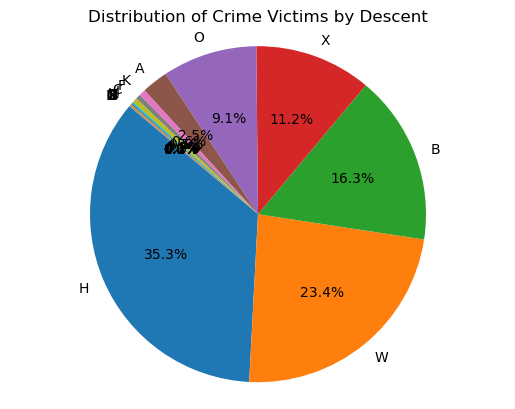

In [52]:
# Provided data of top 10 Victim Descent
Vict_Descent = [
]
Victdescent_counts = []

# Assuming 'Vict Descent' is the column representing victim gender in your dataset
# Replace 'data' with your actual DataFrame containing the crime data
gender_counts = crime_data['Vict Descent'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Crime Victims by Descent')
plt.show()

In [55]:
# Victim Age & Count of Crimes
crime_count_age = crime_data['Vict Age'].value_counts()
display(crime_count_age)


Vict Age
 0     99266
 30    19421
 35    19008
 31    18602
 29    18552
       ...  
 98       67
 97       63
-1        60
-2        13
-3         1
Name: count, Length: 102, dtype: int64

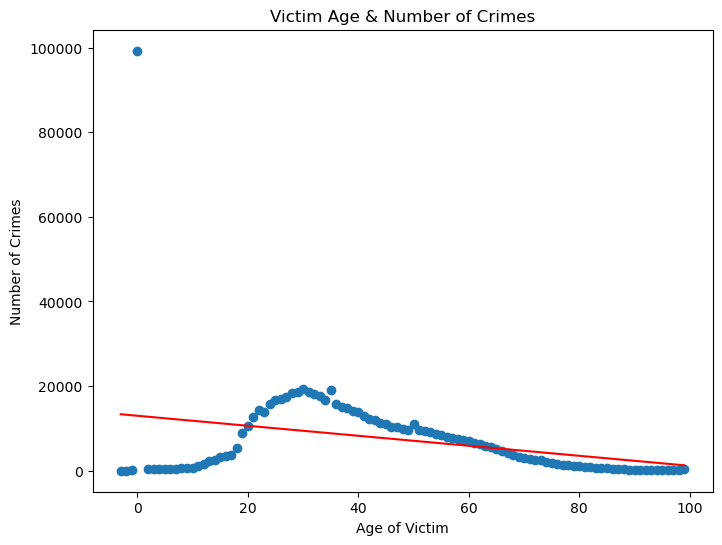

In [108]:
#Plotting Graph: Victim Age & Number of Crimes
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values)
plt.xlabel("Age of Victim")
plt.ylabel("Number of Crimes")
plt.title("Victim Age & Number of Crimes")

#Line of Best Fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(crime_count_age.index, crime_count_age.values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

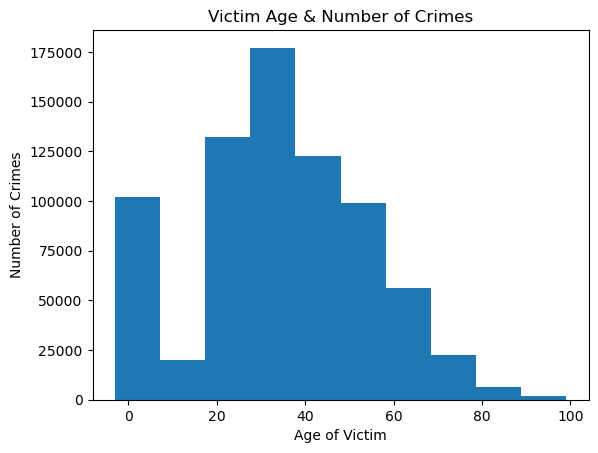

In [95]:
#Histogram Showing the Distribution of Victim Ages.
plt.hist(crime_data['Vict Age'], bins=10)
plt.title("Victim Age & Number of Crimes")
plt.xlabel("Age of Victim")
plt.ylabel("Number of Crimes")
plt.show()